In [2]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from io_utils import *
from plotting_utils import *
from pathlib import Path
from sklearn.decomposition import PCA

# Load data into dictionary
with open('../data/full_traces.pickle', 'rb') as handle:
    dict = pickle.load(handle)

# possible ids for mice
subject_ids = [3095,3096,3097,4013,4014,4015,4016]

In [2]:
print(dict.keys())

dict_keys(['3095_d1_balbc_t1', '3095_d1_balbc_t2', '3095_d1_balbc_t3', '3095_d2_balbc_t1', '3095_d2_balbc_t2', '3095_d2_balbc_t3', '3095_d3_balbc_t1', '3095_d3_balbc_t2', '3095_d3_balbc_t3', '3095_d4_balbc_t1', '3095_d4_balbc_t2', '3095_d4_balbc_t3', '3095_d5_balbc_t1', '3095_d5_balbc_t2', '3095_d5_balbc_t3', '3095_d6_balbc_t1', '3095_d6_balbc_t2', '3095_d6_balbc_t3', '3095_d7_balbc_t1', '3095_d7_balbc_t2', '3095_d7_balbc_t3', '3095_d8_balbc_t1', '3095_d8_balbc_t2', '3095_d8_balbc_t3', '3095_d9_mCD1_t1', '3095_d9_mCD1_t2', '3095_d9_mCD1_t3', '3096_d1_balbc_t1', '3096_d1_balbc_t2', '3096_d1_balbc_t3', '3096_d2_balbc_t1', '3096_d2_balbc_t2', '3096_d2_balbc_t3', '3096_d3_balbc_t1', '3096_d3_balbc_t2', '3096_d3_balbc_t3', '3096_d4_balbc_t1', '3096_d4_balbc_t2', '3096_d4_balbc_t3', '3096_d5_balbc_t1', '3096_d5_balbc_t2', '3096_d5_balbc_t3', '3096_d6_balbc_t1', '3096_d6_balbc_t2', '3096_d6_balbc_t3', '3096_d7_balbc_t1', '3096_d7_balbc_t2', '3096_d7_balbc_t3', '3096_d8_balbc_t1', '3096_d8_bal

In [3]:
print(dict['4016_d2_balbc_t2'].columns)
print(dict['3095_d3_balbc_t1'].columns)

Index(['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)',
       'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)',
       'VMH (E)', 'VMH (I)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'PA (E)',
       'PA (I)', 'NAc (DA)', 'unsupervised labels', 'supervised labels'],
      dtype='object')
Index(['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)',
       'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)',
       'VMH (E)', 'VMH (I)', 'NAc (DA)', 'unsupervised labels',
       'supervised labels'],
      dtype='object')


In [4]:
print(check_exist(mouseId=3095,path=None))

(True, PosixPath('/Users/lencacuturela/Desktop/Research/github/Falkner_Multi-region_Aggression/data/3095.csv'))


In [5]:
load_and_wrangle(mouseId=4016, path=None, overwrite=False)


,subject,other,day,trial,PrL (E),PrL (I),vLS (E),vLS (I),POA (E),POA (I),...,VMH (E),VMH (I),PMv (E),PMv (I),LHb (E),PA (E),PA (I),NAc (DA),unsupervised labels,supervised labels
0,4016,balb,1,1,0.936559,1.462288,0.030201,0.777412,-1.683529,-1.521448,...,0.640263,0.228603,-0.799579,-0.989827,0.008606,-0.596152,0.296085,-1.403776,5,0
1,4016,balb,1,1,1.030411,1.769007,0.109279,0.920585,-1.553248,-1.389656,...,0.679561,0.332954,-0.759557,-0.918345,-0.029512,-0.307833,0.568364,-1.400318,5,0
2,4016,balb,1,1,1.164938,2.118272,0.231091,1.072707,-1.285222,-1.236813,...,0.738315,0.453349,-0.658519,-0.825992,-0.015103,0.076160,0.875165,-1.357716,5,0
3,4016,balb,1,1,1.341964,2.507646,0.401881,1.233178,-0.866341,-1.062659,...,0.816908,0.589333,-0.489915,-0.712276,0.062911,0.549974,1.214195,-1.269836,3,0
4,4016,balb,1,1,1.560323,2.933559,0.625152,1.401545,-0.292597,-0.867207,...,0.914666,0.739892,-0.251274,-0.577227,0.211277,1.101833,1.582314,-1.132900,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537171,4016,mCD1,9,3,-0.579453,-0.784780,-0.113112,-0.454274,-0.761921,-1.139962,...,-0.387115,-0.960957,-0.248305,-1.052049,1.500971,-0.888567,-1.396829,-0.795804,4,0
537172,4016,mCD1,9,3,-0.566121,-0.629928,-0.088840,-0.400871,-0.741517,-1.153827,...,-0.397174,-0.977945,-0.244916,-1.025833,1.781089,-0.922451,-1.351286,-0.688127,4,0
537173,4016,mCD1,9,3,-0.562356,-0.412961,-0.020877,-0.369679,-0.702065,-1.137927,...,-0.406668,-1.003387,-0.233609,-0.940923,2.136928,-0.949573,-1.286938,-0.579722,4,0
537174,4016,mCD1,9,3,-0.599589,-0.117326,0.099659,-0.401065,-0.657963,-1.081928,...,-0.422176,-1.037981,-0.211399,-0.761976,2.576618,-0.988582,-1.198751,-0.548178,4,0


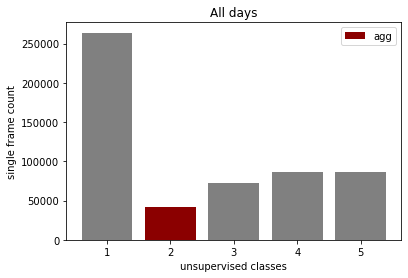

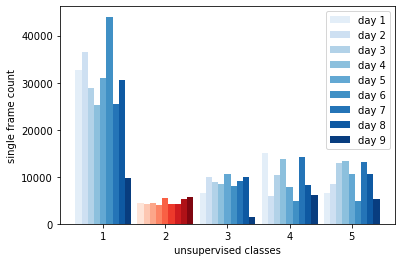

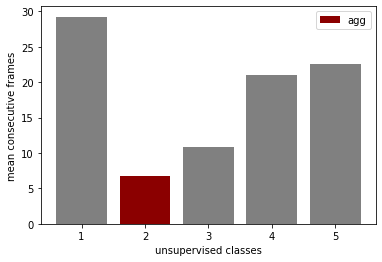

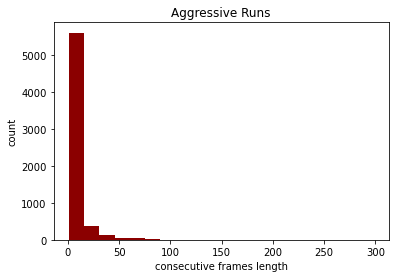

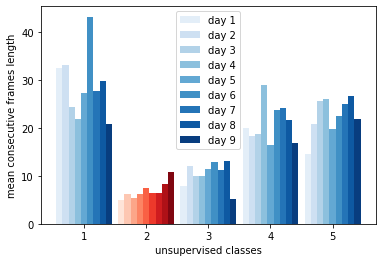

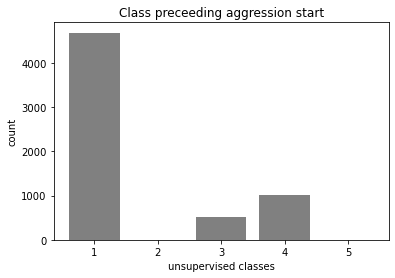

In [2]:
behaviorDistributions(mouseId=3095,path=None,type='unsupervised')

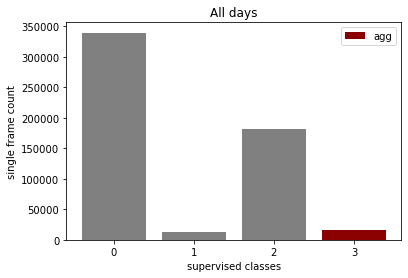

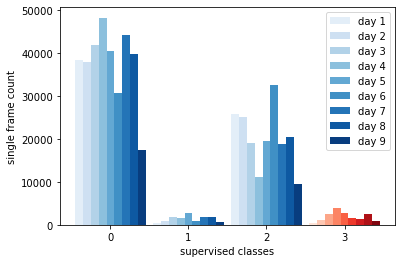

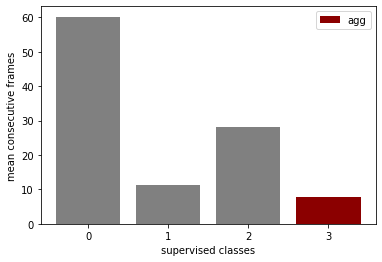

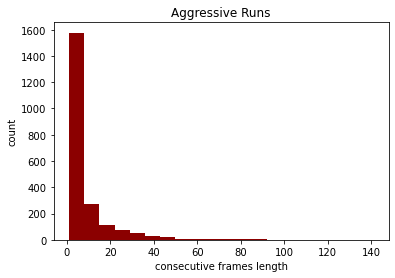

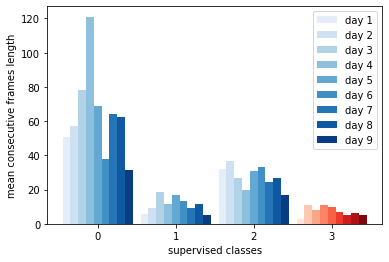

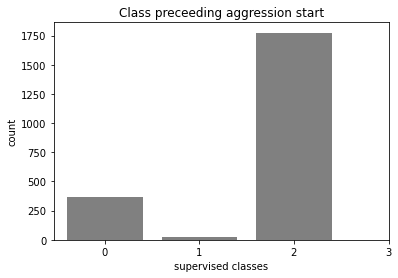

In [3]:
behaviorDistributions(mouseId=3095,path=None,type='supervised')

In [100]:
for id in subject_ids:
    load_and_wrangle(mouseId=id, path=None, overwrite=True)

Variance for each brain region
[0.14779717 0.04421218 0.08908049 0.03551362 0.16945907 0.07587813
 0.09675992 0.06006238 0.23102562 0.01704771 0.27294888 0.12655844
 0.30613906 0.05618241 0.09706614]


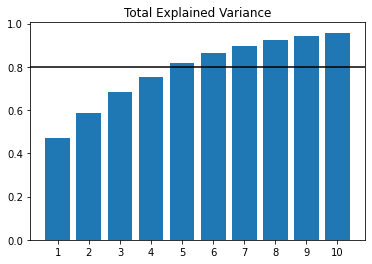

In [17]:
def PCAfunction(mouseId, path=None, type=None):
    df = load_and_wrangle(mouseId=mouseId, path=path, overwrite=False)
    temp = df.drop(columns=['subject','other','day','trial','unsupervised labels','supervised labels'])
    
    # filtering or averaging for certain days/trials

    # preparing matrix X
    x = np.array(temp)
    print("Variance for each brain region")
    print(x.mean(axis=0))

    n_comp=10
    pca = PCA(n_components=n_comp)
    y = pca.fit_transform(x)
    c_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.title("Total Explained Variance")
    plt.bar(range(1,n_comp+1),c_explained_variance)
    plt.xticks(range(1,n_comp+1))
    plt.axhline(0.8,color='black')
    plt.show()

PCAfunction(mouseId=3095, path=None, type=None)
